In [1]:
using CSV, DataFrames, Polynomials, Plots

In [2]:
# Read data from CSV file
# Strip spaces from column names
df = CSV.read("series.csv", DataFrame)
rename!(df, Symbol.(strip.(string.(names(df)), ' ')))

Row,xs,ys1,ys2,ys3
,Int64,Int64,Int64,Int64
1,0,5,5,5
2,1,9,12,14
3,2,13,25,41
4,3,17,44,98
5,4,21,69,197
6,5,25,100,350
7,6,29,137,569
8,7,33,180,866
9,8,37,229,1253


In [3]:
# Extract columns from DataFrame
xs = df.xs
ys = df.ys2
println(xs, "\n", ys, "\n")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[5, 12, 25, 44, 69, 100, 137, 180, 229, 284, 345, 412, 485]



In [4]:
# Perform quadratic regression for ys
pf = fit(xs, ys, 2)
cfs_r = reverse(coeffs(pf))
cfs_fmt = [
  round(c, digits=2) for c in cfs_r]

println("Coefficients (a, b, c) for ys:")
println(cfs_fmt, "\n")

Coefficients (a, b, c) for ys:
[3.0, 4.0, 5.0]



In [5]:
# Generate Series for Plotting
xp = range(minimum(xs), maximum(xs), length=100)
yp = pf.(xp)

100-element Vector{Float64}:
   4.999999999999879
   5.528925619834594
   6.146005509641761
   6.85123966942138
   7.644628099173451
   8.526170798897972
   9.495867768594946
  10.553719008264371
  11.69972451790625
  12.933884297520578
  14.25619834710736
  15.66666666666659
  17.165289256198275
   ⋮
 388.9999999999999
 397.2865013774103
 405.66115702479317
 414.1239669421486
 422.6749311294765
 431.3140495867767
 440.04132231404947
 448.8567493112946
 457.76033057851225
 466.7520661157023
 475.8319559228649
 484.9999999999998

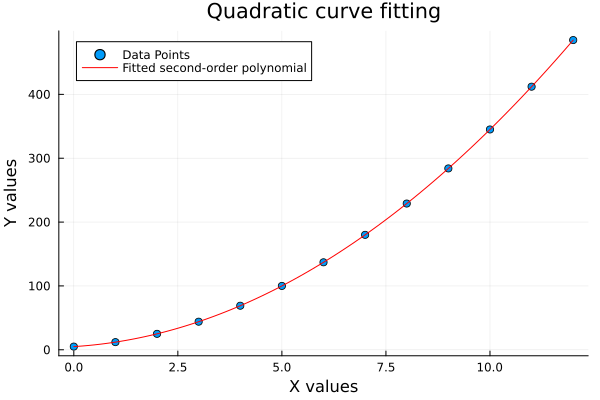

In [6]:
# Plotting
scatter(xs, ys,
  label="Data Points")
plot!(xp, yp, color=:red,
  label="Fitted second-order polynomial")
xlabel!("X values")
ylabel!("Y values")
title!("Quadratic curve fitting")